In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [132]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000,NEAR BAY
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000,NEAR BAY
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000,NEAR BAY
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000,NEAR BAY
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000,NEAR BAY


In [133]:
df = df.dropna()
# df = pd.get_dummies(df, columns=['ocean_proximity'])

In [105]:
df.shape

(20433, 10)

In [134]:
X = df[['median_income']]
y= df[['median_house_value']]

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

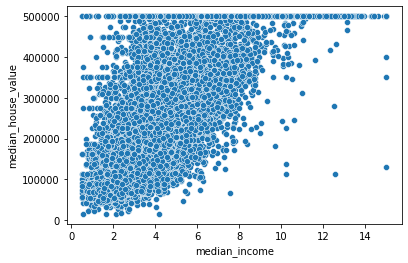

In [114]:
sns.scatterplot(data=df, x='median_income', y='median_house_value')

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [97]:
model_params = {
    
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
             'max_depth':np.array(range(1,11))
         }  
    }
}

In [35]:
np.array(range(1,10))

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [98]:
# Hyper-parameter tuning 
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'],mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,decision_tree,0.707,{'max_depth': 9}


In [152]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge

regressor = LinearRegression()
regressor.fit(X_train,y_train)
lg_predicted = regressor.predict(X_test)

lasso_regressor = Lasso()
lasso_regressor.fit(X_train,y_train)
lasso_predicted = regressor.predict(X_test)

ridge_regressor = Ridge()
ridge_regressor.fit(X_train,y_train)
ridge_predicted = regressor.predict(X_test)

tree = DecisionTreeRegressor(max_depth=9)
tree.fit(X_train,y_train)
tree_predicted = tree.predict(X_test)



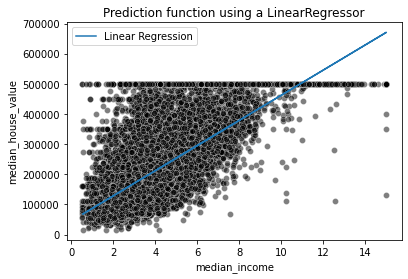

In [153]:
sns.scatterplot(data=df, x='median_income', y='median_house_value',
                color="black", alpha=0.5)
plt.plot(X_test['median_income'], lg_predicted, label="Linear Regression")
plt.legend()
_ = plt.title("Prediction function using a LinearRegressor")

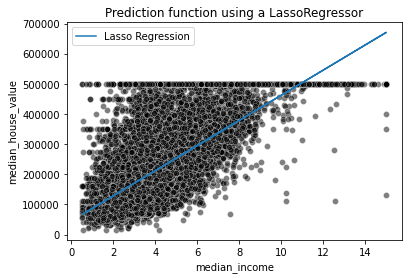

In [154]:
sns.scatterplot(data=df, x='median_income', y='median_house_value',
                color="black", alpha=0.5)
plt.plot(X_test['median_income'], lasso_predicted, label="Lasso Regression")
plt.legend()
_ = plt.title("Prediction function using a LassoRegressor")

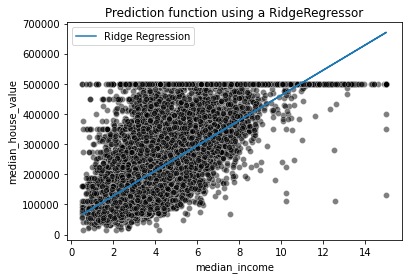

In [155]:
sns.scatterplot(data=df, x='median_income', y='median_house_value',
                color="black", alpha=0.5)
plt.plot(X_test['median_income'], ridge_predicted, label="Ridge Regression")
plt.legend()
_ = plt.title("Prediction function using a RidgeRegressor")

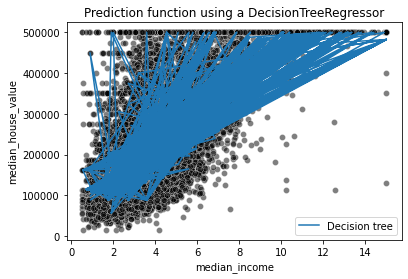

In [156]:
sns.scatterplot(data=df, x='median_income', y='median_house_value',
                color="black", alpha=0.5)
plt.plot(X_test['median_income'], tree_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

In [ ]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(14, 12))
_ = plot_tree(tree, feature_names=X.columns, ax=ax)